In [37]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Get the dataset
df = pd.read_csv('Mall_Customers.csv')

In [39]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

Looking at distribution of a single variable

In [40]:
# Distribution
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [41]:
# Gender comparison
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

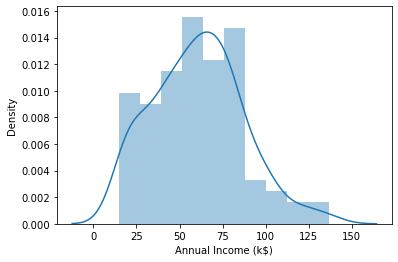

In [42]:
# Spending Score
sns.distplot(df['Annual Income (k$)']);

Presents normal distribution for annual income.

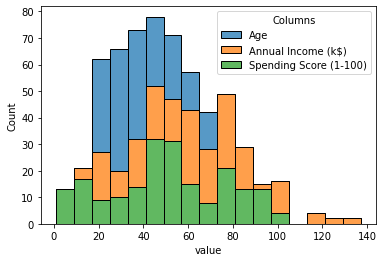

In [43]:
# All columns at once
Columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
sns.histplot(data=df[Columns].melt(var_name='Columns'), x='value', hue='Columns', multiple='stack');

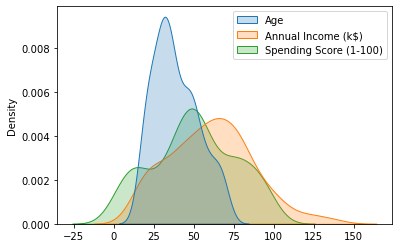

In [44]:
# Distribution based on gender
# Cumulative plot
Columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
sns.kdeplot(data=df[Columns],shade=True);

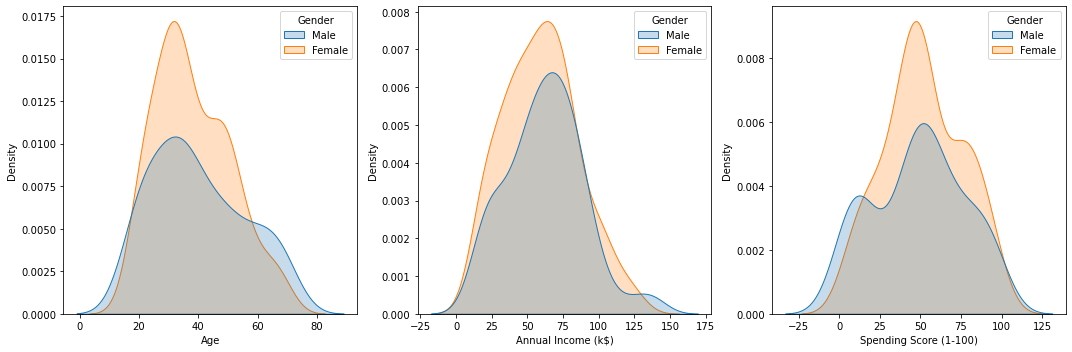

In [45]:
# Individual plot
Columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

for i, x in enumerate(Columns):
    sns.kdeplot(df[x], shade=True, hue=df['Gender'], ax=axs[i])

plt.tight_layout()
plt.show()

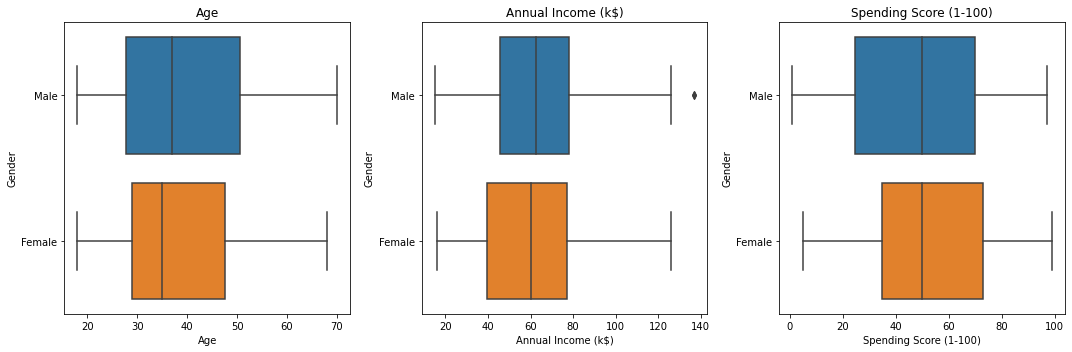

In [46]:
# Boxplots

Columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

fig, axs = plt.subplots(ncols=3, figsize=(15,5))
for i, j in enumerate(Columns):
    sns.boxplot(data=df,y='Gender', x=j, ax=axs[i], orient='h')
    axs[i].set_title(j)
    
plt.tight_layout()
plt.show()

Notice the outlier on the second plot (on annual income boxplot)

# Bivariate Analysis

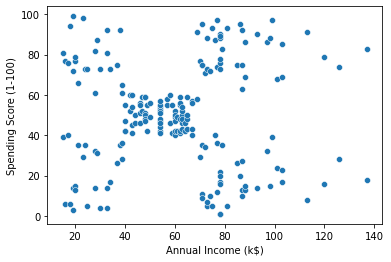

In [47]:
# Scater data

sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)');

About five undefined clusters of data.

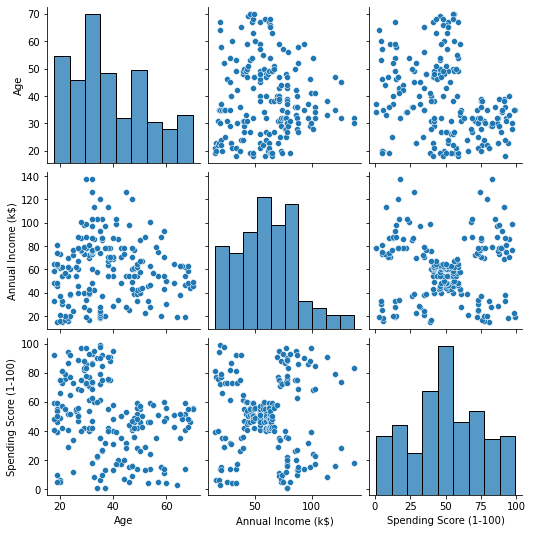

In [51]:
# Pairplots
# ID does not manifest any value on pairplots

df=df.drop('CustomerID', axis=1)

# Plot

sns.pairplot(df);

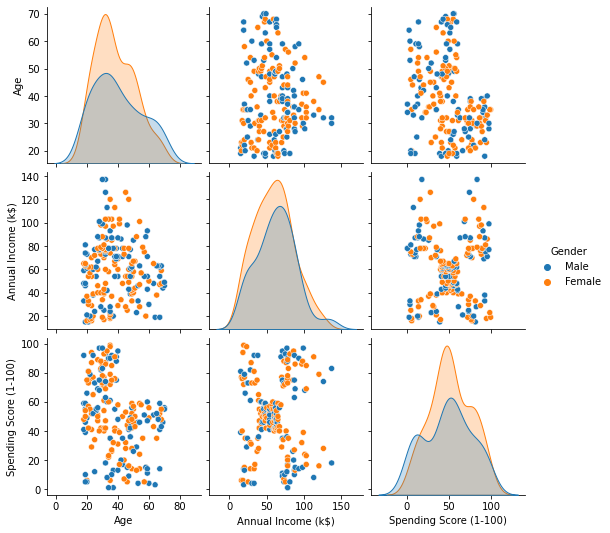

In [50]:
# Plot

sns.pairplot(df,hue='Gender');

In [54]:
# Mean values by gender

df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [56]:
# Correlation

df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


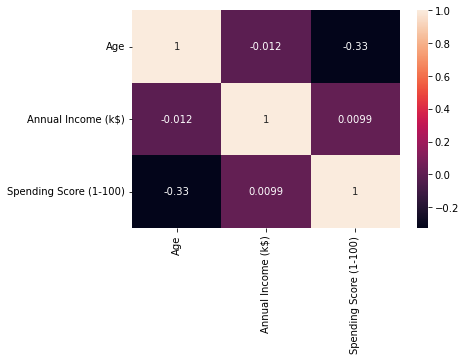

In [59]:
# Heatmap

sns.heatmap(df.corr(),annot=True);